In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_csv("Ads_CTR_Optimisation.csv")

class ThompsonAgent(object):
    
    def __init__(self, data):
        self.database= data
        self.N= data.shape[0]
        self.d= data.shape[1]
        self.arms= []
        self.number_rewards_1= [0] * self.d
        self.number_rewards_0= [0] * self.d
        self.total_reward=0

    def act(self):
        import random

        for n in range(0, self.N):
            ad=0
            max_random=0
            for i in range(0, self.d):
                random_beta= random.betavariate(self.number_rewards_1[i] + 1, self.number_rewards_0[i] + 1)
                if random_beta> max_random:
                    max_random= random_beta
                    ad= i
            self.arms.append(ad)
            reward= self.database.values[n, ad]
            
            if reward==1:
                self.number_rewards_1[ad] += 1
            else:
                self.number_rewards_0[ad] += 1

            self.total_reward += reward

In [3]:
agent= ThompsonAgent(df)
agent.act()

In [4]:
print(agent.number_rewards_0)
print(agent.number_rewards_1)

[96, 97, 53, 132, 6649, 24, 46, 233, 36, 37]
[17, 16, 5, 27, 2462, 0, 4, 61, 3, 2]


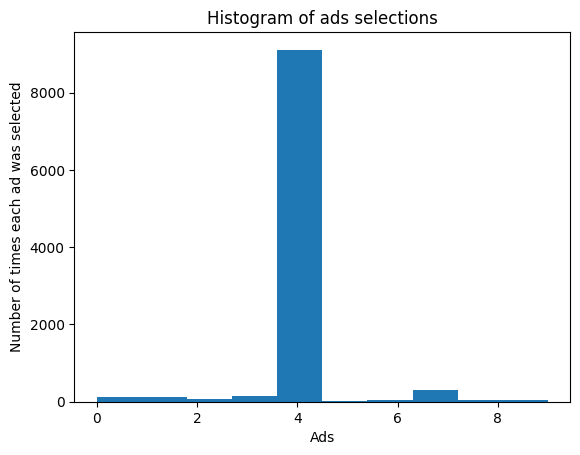

In [5]:
plt.hist(agent.arms)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()